In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.impute import SimpleImputer

# 1. Загрузка данных
# (Предположим, данные сохранены в файл 'cervical_cancer.csv')
# Для примера создадим DataFrame из вашего текста
df = pd.read_csv('Cervical_cancer_Risk_factors.csv', na_values='?')

# 2. Предобработка данных
# Удаляем столбцы с очень большим количеством пропусков (STD time since...)
df = df.drop(['STDs: Time since first diagnosis', 'STDs: Time since last diagnosis'], axis=1)

# Заполняем остальные пропуски медианным значением
imputer = SimpleImputer(strategy='median')
df_clean = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# 3. Разделение на признаки (X) и целевую переменную (y)
# Цель: предсказать результат Биопсии
X = df_clean.drop(['Hinselmann', 'Schiller', 'Citology', 'Biopsy'], axis=1)
y = df_clean['Biopsy']

# Разделяем на обучающую и тестовую выборки (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Обучение модели
# Используем Random Forest (Случайный лес)
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

# 5. Проверка результатов
y_pred = model.predict(X_test)

print("--- Отчет по классификации ---")
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

# 6. Важность признаков
importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\n--- Топ-5 важных факторов риска ---")
print(importances.head(5))

--- Отчет по классификации ---
              precision    recall  f1-score   support

         0.0       0.94      0.99      0.96       161
         1.0       0.00      0.00      0.00        11

    accuracy                           0.93       172
   macro avg       0.47      0.50      0.48       172
weighted avg       0.88      0.93      0.90       172

Accuracy: 0.93

--- Топ-5 важных факторов риска ---
                           Feature  Importance
0                              Age    0.198640
2         First sexual intercourse    0.154385
8  Hormonal Contraceptives (years)    0.153039
1        Number of sexual partners    0.122999
3               Num of pregnancies    0.101758


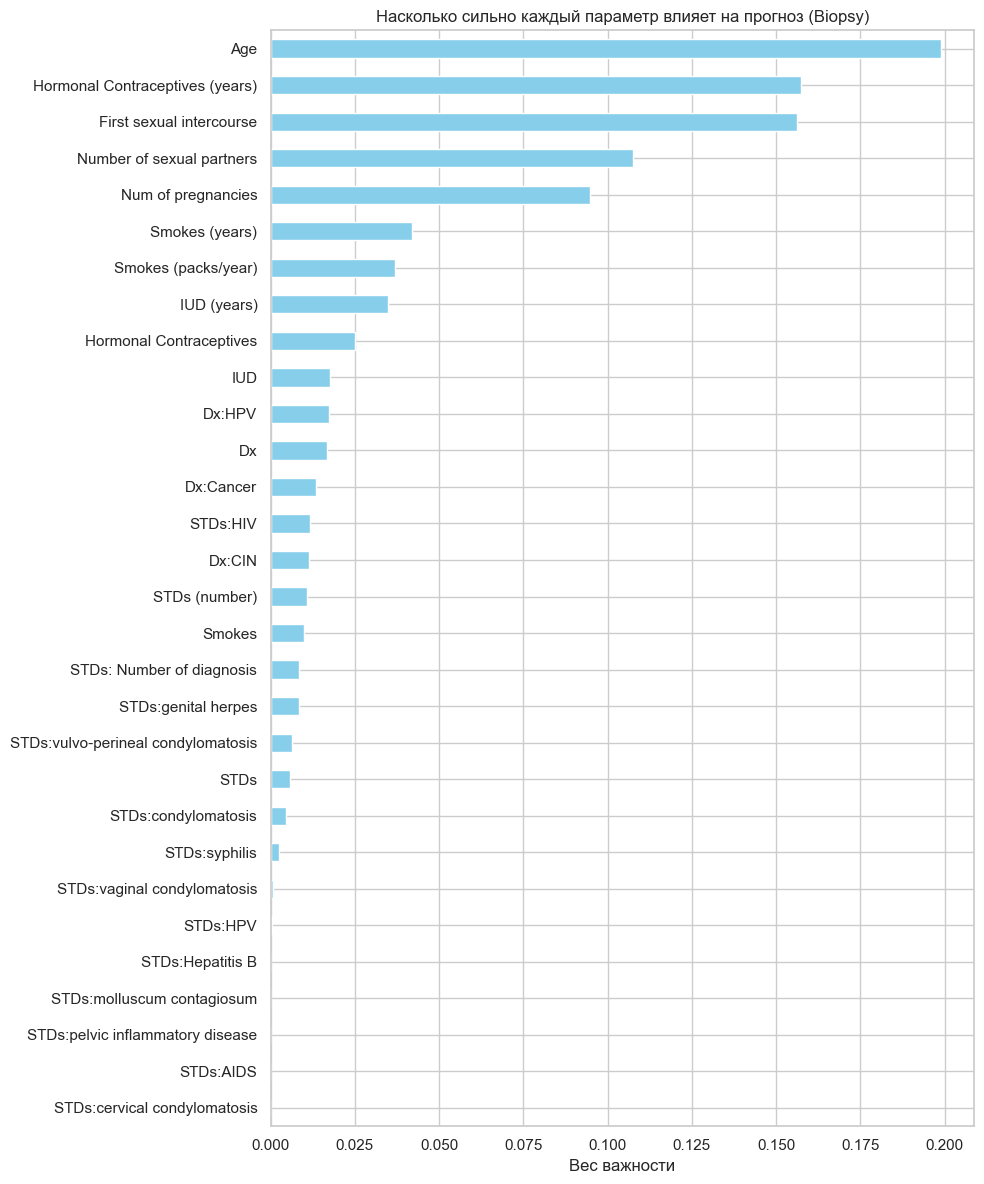

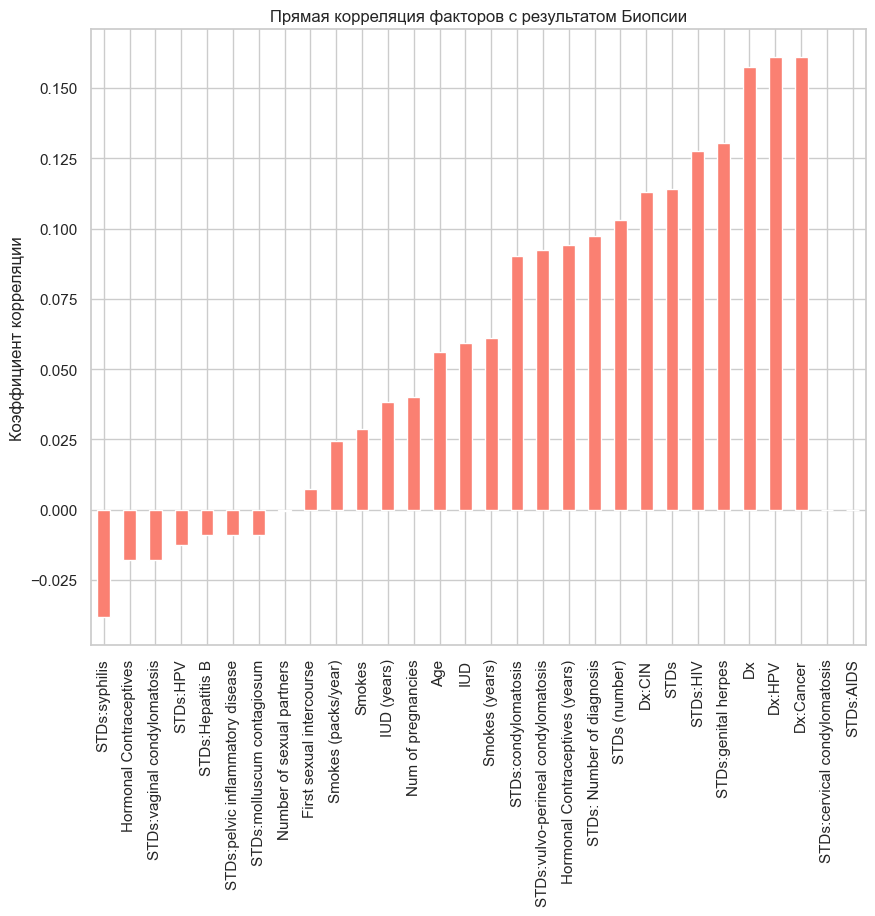

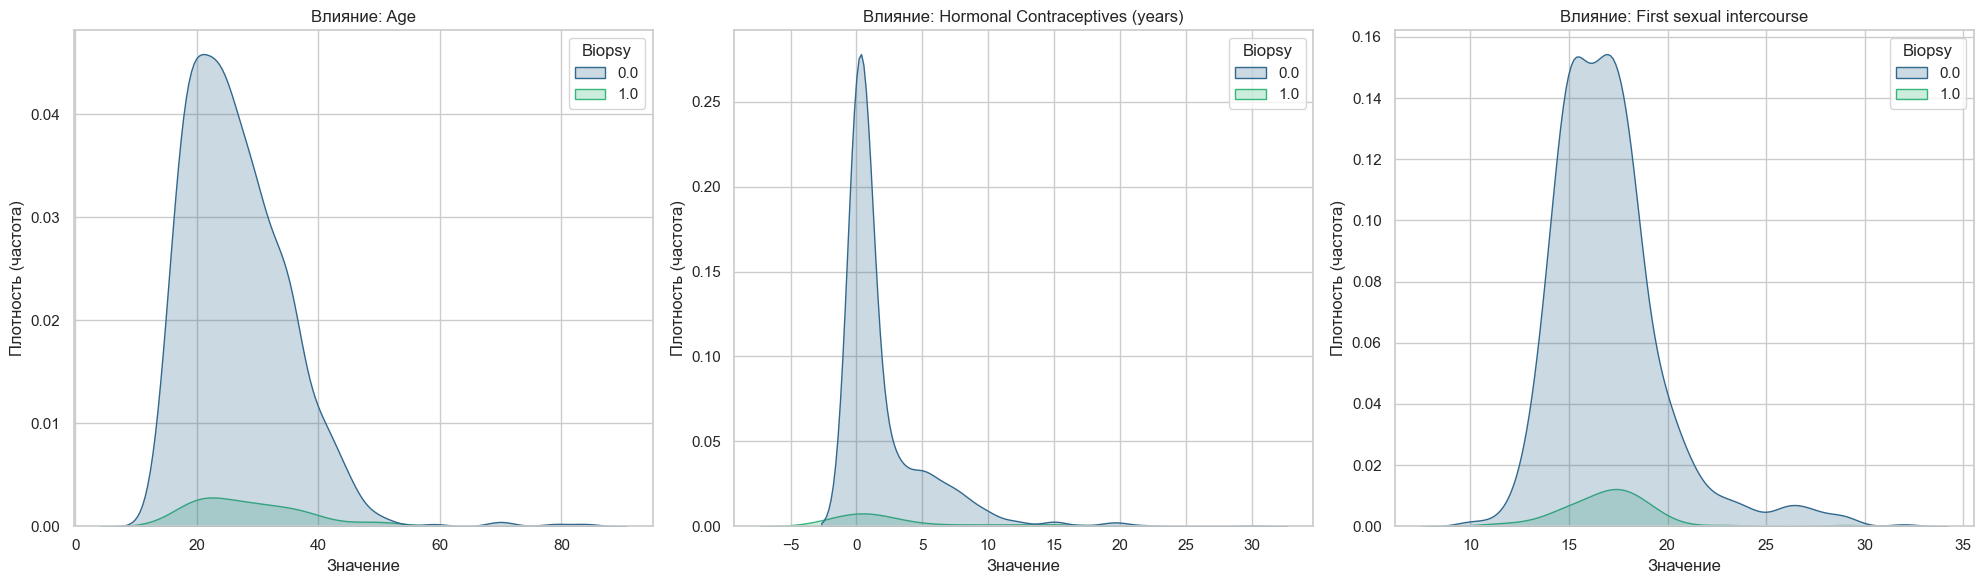

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer

# 1. Загрузка и очистка
df = pd.read_csv('Cervical_cancer_Risk_factors.csv', na_values='?')
df = df.drop(['STDs: Time since first diagnosis', 'STDs: Time since last diagnosis'], axis=1)

# Заполняем пропуски для графиков
imputer = SimpleImputer(strategy='median')
df_clean = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Настройка стиля графиков
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

# 2. ВАЖНОСТЬ ПРИЗНАКОВ (Feature Importance)
X = df_clean.drop(['Hinselmann', 'Schiller', 'Citology', 'Biopsy'], axis=1)
y = df_clean['Biopsy']

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=True)

plt.figure(figsize=(10, 12))
importances.plot(kind='barh', color='skyblue')
plt.title('Насколько сильно каждый параметр влияет на прогноз (Biopsy)')
plt.xlabel('Вес важности')
plt.tight_layout()
plt.show()

# 3. КОРРЕЛЯЦИЯ С ЦЕЛЕВОЙ ПЕРЕМЕННОЙ
# Посмотрим только на связь факторов с Биопсией
correlations = df_clean.corr()['Biopsy'].drop(['Biopsy', 'Hinselmann', 'Schiller', 'Citology']).sort_values()

plt.figure(figsize=(10, 8))
correlations.plot(kind='bar', color='salmon')
plt.title('Прямая корреляция факторов с результатом Биопсии')
plt.ylabel('Коэффициент корреляции')
plt.xticks(rotation=90)
plt.show()

# 4. ВИЗУАЛИЗАЦИЯ ТОП-3 ФАКТОРОВ
# Посмотрим, как распределяются значения у здоровых (0) и больных (1)
top_features = importances.sort_values(ascending=False).index[:3]

fig, axes = plt.subplots(1, 3, figsize=(20, 6))
for i, col in enumerate(top_features):
    sns.kdeplot(data=df_clean, x=col, hue='Biopsy', fill=True, ax=axes[i], palette='viridis')
    axes[i].set_title(f'Влияние: {col}')
    axes[i].set_xlabel('Значение')
    axes[i].set_ylabel('Плотность (частота)')

plt.tight_layout()
plt.show()